读取前面01、02、03预测出的三个月数据。进行汇总合并

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df1=pd.read_csv('output/样本数据预测的1月predict_sku1.csv')
df2=pd.read_csv('output/样本数据预测的2月predict_sku1.csv') 
df3 =pd.read_csv('output/样本数据预测的3月predict_sku1.csv') 
df1

,销售区域编码,产品编码,产品大类编码,产品细类编码,1月总需求量
0,101,20002,303,406,186
1,101,20003,301,405,468
2,101,20006,307,403,184
3,101,20011,303,401,198
4,101,20014,307,403,60
...,...,...,...,...,...
2614,105,22066,307,403,536
2615,105,22072,305,412,279
2616,105,22075,307,403,210
2617,105,22083,303,401,307


In [3]:
df  =  pd.merge(df1,df2)  # 外联模式下
df =pd.merge(df,df3)
df 

,销售区域编码,产品编码,产品大类编码,产品细类编码,1月总需求量,2月总需求量,3月总需求量
0,101,20002,303,406,186,168,186
1,101,20003,301,405,468,312,386
2,101,20006,307,403,184,168,186
3,101,20011,303,401,198,183,181
4,101,20014,307,403,60,84,93
...,...,...,...,...,...,...,...
2614,105,22066,307,403,536,428,217
2615,105,22072,305,412,279,252,186
2616,105,22075,307,403,210,212,227
2617,105,22083,303,401,307,280,341


In [4]:
df.iloc[2614:2615,6:7] = 417

# 制作提交数据样例格式：

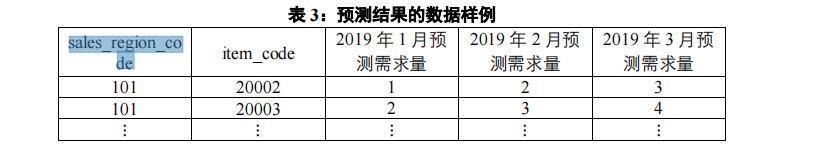

In [5]:
submit_df = df[['销售区域编码','产品编码','1月总需求量','2月总需求量','3月总需求量']]
submit_df.columns=['sales_region_code','item_code','2019年1月预测需求量','2019年2月预测需求量','2019年3月预测需求量']
submit_df

,sales_region_code,item_code,2019年1月预测需求量,2019年2月预测需求量,2019年3月预测需求量
0,101,20002,186,168,186
1,101,20003,468,312,386
2,101,20006,184,168,186
3,101,20011,198,183,181
4,101,20014,60,84,93
...,...,...,...,...,...
2614,105,22066,536,428,417
2615,105,22072,279,252,186
2616,105,22075,210,212,227
2617,105,22083,307,280,341


In [6]:
# 保存
submit_df.to_csv('output/提交结果.csv',index=False)

In [7]:
# 保存
submit_df.to_excel('output/提交结果1.xlsx',index=False)